
----- Training Models for All Features -----

Sim_Gradient Boosting Ensemble (All Features) Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


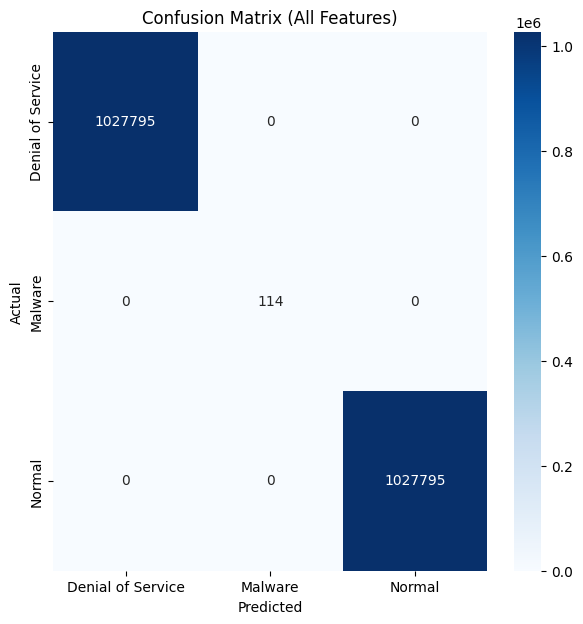


----- Training Models for IG Top 5 Features -----

Sim_Gradient Boosting Ensemble (IG Top 5 Features) Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


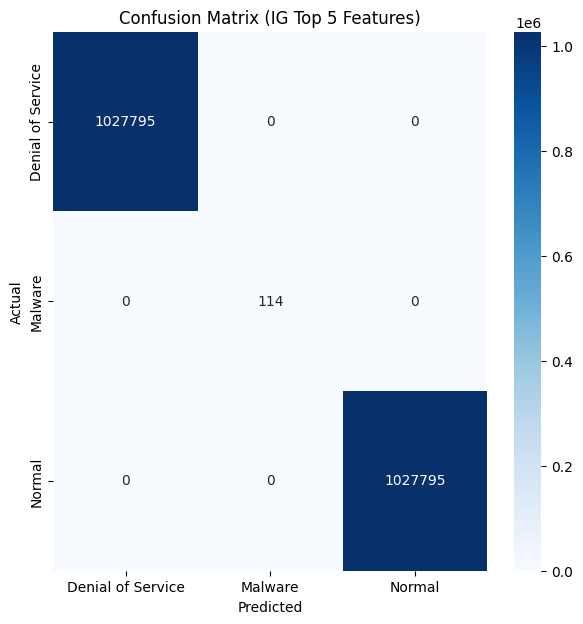


----- Training Models for IG Top 10 Features -----

Sim_Gradient Boosting Ensemble (IG Top 10 Features) Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


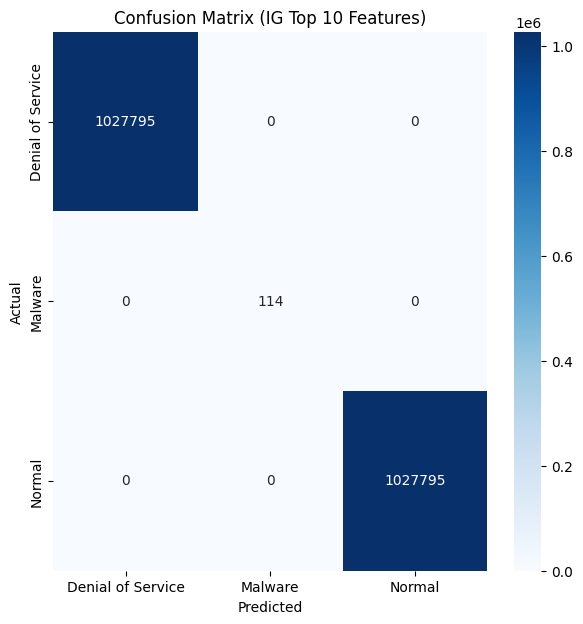


----- Training Models for KBest Top 5 Features -----

Sim_Gradient Boosting Ensemble (KBest Top 5 Features) Metrics:
Accuracy: 0.999969353564521
Precision: 0.9999690006733772
Recall: 0.999969353564521
F1 Score: 0.9999661108363722


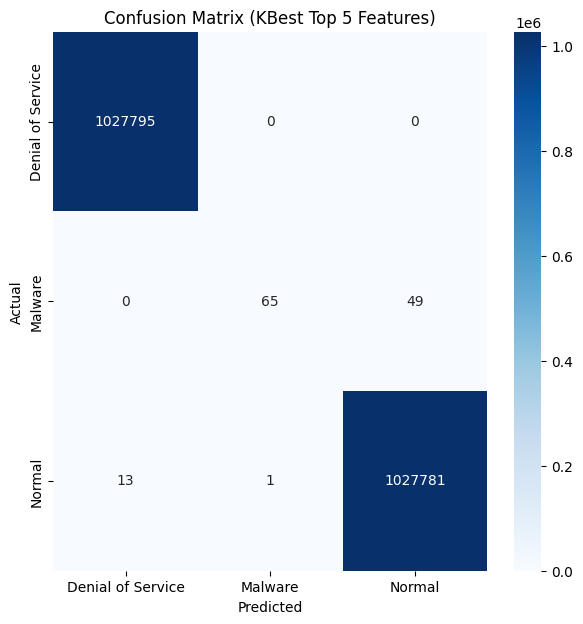


----- Training Models for KBest Top 10 Features -----

Sim_Gradient Boosting Ensemble (KBest Top 10 Features) Metrics:
Accuracy: 0.9999946490350751
Precision: 0.9999946490923433
Recall: 0.9999946490350751
F1 Score: 0.9999946490350748


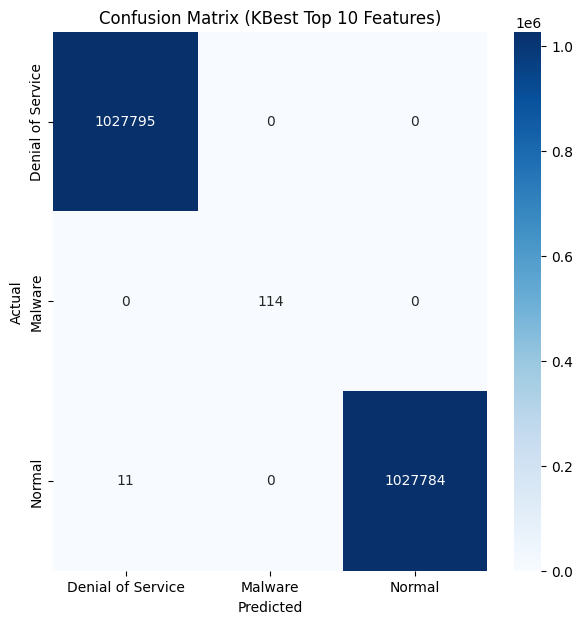

In [1]:
import time
from sklearn.ensemble import GradientBoostingClassifier
import sys
sys.path.append('/home/ibibers/IDS Project/IDS-Machine-Learning-Techniques-')
from Simargl import data_preprocessing, evaluate_model, plot_confusion_matrix


# ---------------------------- Model Training and Evaluation ----------------------------
results = []
datasets, le = data_preprocessing()
for name, (X_tr, X_te, y_train , y_test) in datasets.items():
    print(f"\n----- Training Models for {name} -----")

    start_time = time.time()

    GradientB_model= GradientBoostingClassifier()

    GradientB_model.fit(X_tr, y_train)
    train_end_time = time.time()

    y_pred_enc = GradientB_model.predict(X_te)
    pred_end_time = time.time()

    metrics = evaluate_model(y_test, y_pred_enc, f"Sim_Gradient Boosting Ensemble ({name})")
    metrics['Training Time (s)'] = train_end_time - start_time
    metrics['Prediction Time (s)'] = pred_end_time - train_end_time
    metrics['Total Time (s)'] = pred_end_time - start_time
    results.append(metrics)

    plot_confusion_matrix(y_test, y_pred_enc, le.classes_, f"Confusion Matrix ({name})")


In [2]:

# ---------------------------- Summary and Save Results ----------------------------
import pandas as pd
summary = pd.DataFrame(results)
print("\nSummary of Results:")
print(summary)

summary.to_csv("Sim_Gradient_ensemble_classifier_evaluation_summary.csv", index=False)



Summary of Results:
                                               Model  Accuracy  Precision  \
0      Sim_Gradient Boosting Ensemble (All Features)  1.000000   1.000000   
1  Sim_Gradient Boosting Ensemble (IG Top 5 Featu...  1.000000   1.000000   
2  Sim_Gradient Boosting Ensemble (IG Top 10 Feat...  1.000000   1.000000   
3  Sim_Gradient Boosting Ensemble (KBest Top 5 Fe...  0.999969   0.999969   
4  Sim_Gradient Boosting Ensemble (KBest Top 10 F...  0.999995   0.999995   

     Recall  F1 Score  Training Time (s)  Prediction Time (s)  Total Time (s)  
0  1.000000  1.000000       22567.714920            16.528708    22584.243628  
1  1.000000  1.000000        6429.500355            10.608286     6440.108641  
2  1.000000  1.000000        9667.264991            10.245512     9677.510503  
3  0.999969  0.999966        4357.258095             9.284119     4366.542213  
4  0.999995  0.999995        8690.549065            10.109014     8700.658078  
